<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Packages
import pandas as pd
import numpy as np
# statistical packages
import scipy as scipy
%pip install pingouin
import pingouin as pg
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=cf14bd92b4a3f387192bb46dd4efd3a718d585fd8884189f24413eb69d9ff660
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [2]:
#import data set
url="https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Conf_interval.csv"
df =pd.read_csv(url)
df.head()

,Person,Life Expectancy,unemployment days,Gender
0,1,71.870059,1005.0,Male
1,2,63.751966,954.0,Male
2,3,80.990859,1007.0,Male
3,4,74.987716,1016.0,Female
4,5,59.204459,1041.0,Female


In [3]:
#What is the degree of freedom?
Freedom= len(df)-1
Freedom

49

In [4]:
#basic stats
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             50 non-null     int64  
 1   Life Expectancy    48 non-null     float64
 2   unemployment days  49 non-null     float64
 3   Gender             50 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [5]:
# Data Cleaning
df.isnull().sum()

Person               0
Life Expectancy      2
unemployment days    1
Gender               0
dtype: int64

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             47 non-null     int64  
 1   Life Expectancy    47 non-null     float64
 2   unemployment days  47 non-null     float64
 3   Gender             47 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [7]:
df.columns
     

Index(['Person', 'Life Expectancy', 'unemployment days', 'Gender'], dtype='object')

In [8]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['Person', 'LifeExpectancy', 'unemploymentdays', 'Gender'], dtype='object')

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['person', 'lifeexpectancy', 'unemploymentdays', 'gender'], dtype='object')

Text(0.5, 1.0, 'Normal Data')

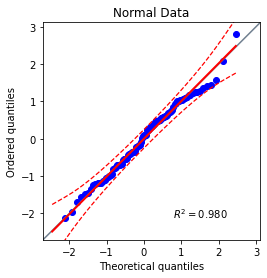

In [10]:
# test Normal distrubution
plt.show()
data = np.random.normal(0,1,100)
pg.qqplot(data).set_title('Normal Data')

Text(0.5, 1.0, 'Nonnormal Data')

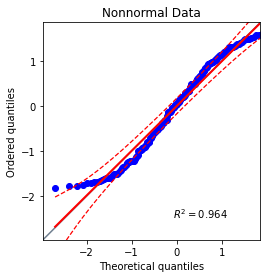

In [11]:
#Non Normal Distribution
plt.show()
data = np.random.uniform(0,7,200)
pg.qqplot(data).set_title('Nonnormal Data')

Text(0.5, 1.0, 'Our Data')

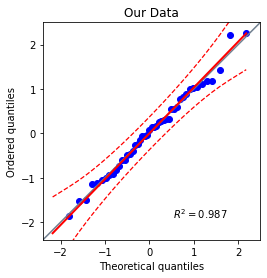

In [12]:
#Our dataset
plt.show()
pg.qqplot(df['lifeexpectancy']).set_title('Our Data')

In [13]:
#Second Testing
# Hypothesis testing for normallity
from scipy import stats
print(stats.normaltest(df['lifeexpectancy']))

NormaltestResult(statistic=0.4656081409753158, pvalue=0.7923087949934116)


Accept this because the pvalue is greater than alpha. 0.7>0.05

In [14]:
#T-testing
stats.ttest_1samp(df['lifeexpectancy'],80)

TtestResult(statistic=-6.869123632210179, pvalue=1.4322880308218528e-08, df=46)

Do not Accept this because the pvalue is not greater than alpha. P<.05

In [15]:
#Taking small sample
df = df.sample(15)
df.head()

,person,lifeexpectancy,unemploymentdays,gender
47,48,70.631396,981.0,Female
35,36,81.917224,957.0,Female
17,18,80.089254,931.0,Male
3,4,74.987716,1016.0,Female
5,6,81.726367,1019.0,Female


In [16]:
stats.ttest_1samp(df['lifeexpectancy'],800)

TtestResult(statistic=-252.9555716425118, pvalue=5.020888537257183e-27, df=14)

In [17]:
T,P=stats.ttest_1samp(df['lifeexpectancy'],800)
T

-252.9555716425118

In [20]:
if P<0.05: print('Reject null hypothesis, this means actual mean is not 80') 
else: print('Accept null hypothesis i.e. actual mean is 80')

Reject null hypothesis, this means actual mean is not 80


In [21]:
CI=stats.ttest_1samp(df['lifeexpectancy'],800).confidence_interval(confidence_level = 0.95)
CI

ConfidenceInterval(low=65.03329625373826, high=77.3919366929284)